# Importing the Libraries required



In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
%matplotlib inLine

# Importing the dataset to be used 

In [4]:
path = "http://bit.ly/w-data"
df = pd.read_csv(path)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.isnull().sum()  #This is used to check whether any null value is present in any column in the dataset

Hours     0
Scores    0
dtype: int64

# Plotting scatter plot to check the relationship between feature and target! 

Text(0, 0.5, 'Scores')

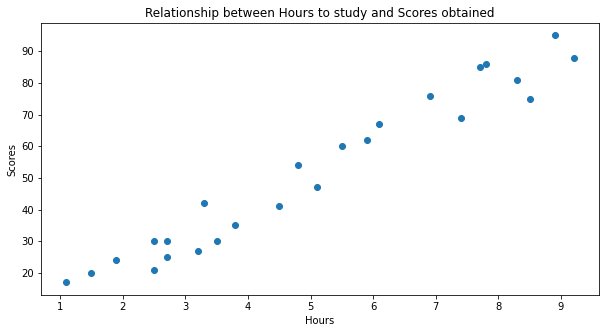

In [7]:
plt.figure(figsize=(10,5))
plt.scatter(x=df['Hours'],y=df['Scores'])
plt.title('Relationship between Hours to study and Scores obtained')
plt.xlabel('Hours')
plt.ylabel('Scores')

# Plotting regressor plot to check the relationship between feature and target!

Text(0, 0.5, 'Scores')

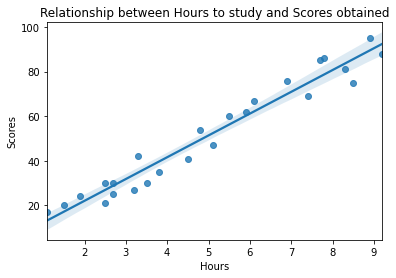

In [8]:
sns.regplot(x=df['Hours'],y=df['Scores'],data=df)
plt.title('Relationship between Hours to study and Scores obtained')
plt.xlabel('Hours')
plt.ylabel('Scores')

# Preparing the data

In [9]:
x= df[['Hours']].values
y=df[['Scores']].values

Using scikit-learn library to split the dataset into training and testing data

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=42)

# Training the model using algorithm

Here the algorithm is Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()

Fitting the model on training data

In [15]:
lm.fit(xtrain,ytrain)

LinearRegression()

Text(0, 0.5, 'Scores')

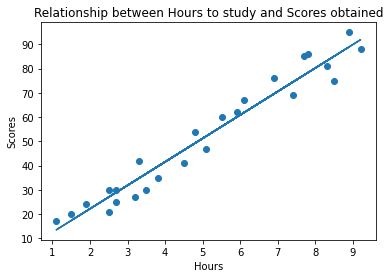

In [16]:
# Plotting the regression line
line = lm.coef_*x+lm.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.title('Relationship between Hours to study and Scores obtained')
plt.xlabel('Hours')
plt.ylabel('Scores')

# Making predictions

In [17]:
print('Training score')
print(lm.score(xtrain, ytrain))
print('Test score')
print(lm.score(xtest, ytest))

Training score
0.9491209376364416
Test score
0.9678055545167994


In [18]:
ypred= lm.predict(xtest)

In [19]:
ytest

array([[81],
       [30],
       [21],
       [76],
       [62]], dtype=int64)

In [20]:
ypred

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

In [21]:
# You can also test with your own data
print("No of Hours = ",9.25)
print("Predicted Score = ",lm.predict([[9.25]])[0][0])

No of Hours =  9.25
Predicted Score =  92.38611528261494


# Evaluating the model

In [22]:
from sklearn import metrics  
print('MAE: ',metrics.mean_absolute_error(ytest, ypred))
print('MSE: ', metrics.mean_squared_error(ytest, ypred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(ytest, ypred)))

MAE:  3.9207511902099244
MSE:  18.943211722315272
RMSE:  4.352380006653288
